In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [5]:
def calc_diff(data):
    ret = {}
    keys = ['step1000', 'step2000', 'step5000', 'step10000', 'step100000']
    for key in keys:
        if key == 'step100000':
            continue
        diff = 0.0
        max_diff = 0.0
        for (i, j) in zip(data[key], data['step100000']):
            diff += abs(i - j)
            max_diff = max(max_diff, abs(i - j))

        average_diff = diff / 1000   
        ret['max diff {0}'.format(key)] = max_diff
        ret['average diff {0}'.format(key)] = average_diff
    return ret

In [6]:
with open('newmark精度テストデータ001', 'rb') as f1:
    newmark_data = pickle.load(f1)

In [7]:
with open('後退オイラー法精度テストデータ001', 'rb') as f2:
    back_data = pickle.load(f2)

In [8]:
newmark_diff = calc_diff(newmark_data)

In [9]:
newmark_diff

{'max diff step1000': 0.00048356656489285943,
 'average diff step1000': 5.231902572199083e-05,
 'max diff step2000': 0.00023820572383756455,
 'average diff step2000': 2.5714416605518717e-05,
 'max diff step5000': 9.206930489771836e-05,
 'average diff step5000': 1.0173395983917757e-05,
 'max diff step10000': 4.353967674342041e-05,
 'average diff step10000': 5.087217449118754e-06}

In [10]:
back_diff = calc_diff(back_data)

In [11]:
back_diff

{'max diff step1000': 0.0010767938749394919,
 'average diff step1000': 0.00022444537125092435,
 'max diff step2000': 0.0005494620039633996,
 'average diff step2000': 0.0001162234526130059,
 'max diff step5000': 0.00021704044290790647,
 'average diff step5000': 4.6352158533221774e-05,
 'max diff step10000': 0.00010344970001371565,
 'average diff step10000': 2.21671450412433e-05}

In [12]:
def plot_log_max_diff(newmark_diff, back_diff, save=False):
    x = np.array([1e3, 2e3, 5e3, 1e4])
    y1 = np.array([newmark_diff['max diff step1000'], 
                   newmark_diff['max diff step2000'],
                   newmark_diff['max diff step5000'],
                   newmark_diff['max diff step10000']], dtype=np.float64)
    y2 = np.array([back_diff['max diff step1000'], 
                   back_diff['max diff step2000'],
                   back_diff['max diff step5000'],
                   back_diff['max diff step10000']], dtype=np.float64)
    
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(x, y1, color='red', label='Newmark B difference', marker='o')
    plt.plot(x, y2, color='blue', label='back Euler difference', marker='o')

    ax = plt.gca()
    ax.spines['top'].set_color('none')

    ##
    ax.set_yscale('log')  # メイン: y軸をlogスケールで描く
    ax.set_xscale('log')
    ##
    plt.title('max difference logarithmic plot') 
    plt.xlabel('step',fontsize=18)
    plt.ylabel('diffence',fontsize=18)

    plt.grid(which="both") # グリッド表示。"both"はxy軸両方にグリッドを描く。
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=14)

    if save:
        plt.savefig('max_diff.png')

    plt.show()
    
def plot_log_average_diff(newmark_diff, back_diff, save=False):
    x = np.array([1e3, 2e3, 5e3, 1e4])
    y1 = np.array([newmark_diff['average diff step1000'], 
                   newmark_diff['average diff step2000'],
                   newmark_diff['average diff step5000'],
                   newmark_diff['average diff step10000']], dtype=np.float64)
    y2 = np.array([back_diff['average diff step1000'], 
                   back_diff['average diff step2000'],
                   back_diff['average diff step5000'],
                   back_diff['average diff step10000']], dtype=np.float64)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(x, y1, color='red', label='Newmark B difference', marker='o')
    plt.plot(x, y2, color='blue', label='back Euler difference', marker='o')

    ax = plt.gca()
    ax.spines['top'].set_color('none')

    ##
    ax.set_yscale('log')  # メイン: y軸をlogスケールで描く
    ax.set_xscale('log')
    ##
    plt.title('average difference logarithmic plot') 
    plt.xlabel('step',fontsize=18)
    plt.ylabel('diffence',fontsize=18)

    plt.grid(which="both") # グリッド表示。"both"はxy軸両方にグリッドを描く。
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=14)

    if save:
        plt.savefig('average_diff.png')

    plt.show()    

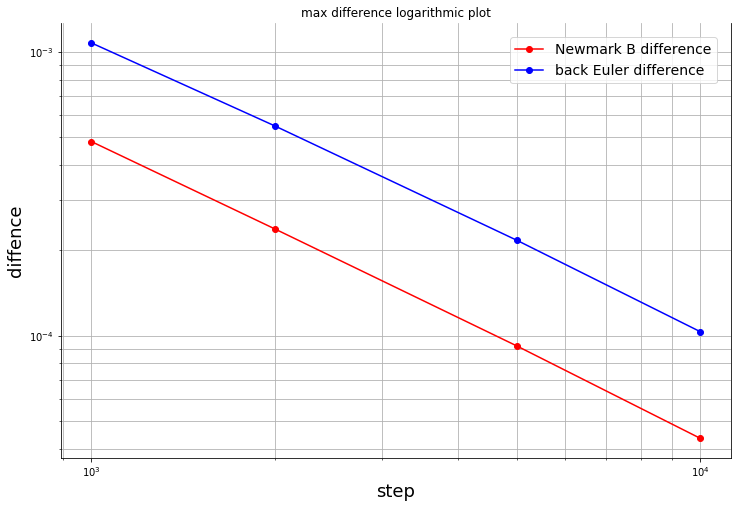

In [13]:
plot_log_max_diff(newmark_diff, back_diff)

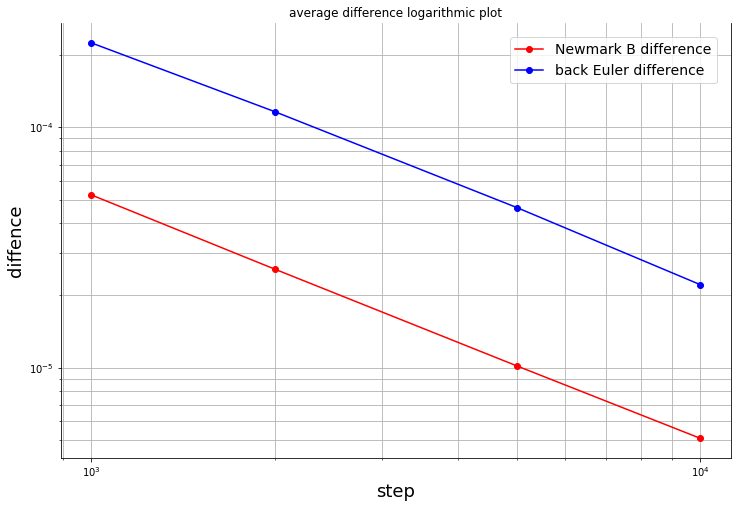

In [14]:
plot_log_average_diff(newmark_diff, back_diff)